In [72]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


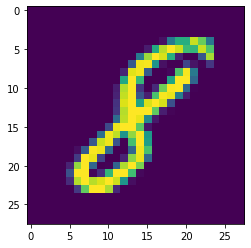

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
i = 7777 # You may select anything up to 60,000
print(y_train[i])
plt.imshow(x_train[i])

In [24]:

x_train.shape

(60000, 28, 28)

In [74]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(8,4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 6)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [76]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 37s 616us/step - loss: 0.2080 - acc: 0.9376
Epoch 2/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.0711 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.0519 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.0424 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.0360 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0317 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0267 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.0235 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 29s 487us/step - loss: 0

In [77]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 197us/step


[0.03438698713182093, 0.9905]

1 1


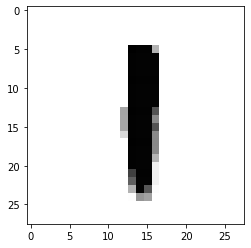

In [81]:
#model predicting
image_index = 345
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax(), y_test[image_index])